Data comes from a polynomial $t = 5x^3 - x^2 + x + \epsilon$ where $\epsilon = \mathcal{N}(0, 150)$ 

In [32]:
import matplotlib
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm

epsilon = norm(loc=0, scale=300)

def polynoise(x):
    x = np.atleast_1d(x)
    return 5*x**3 -x**2 + x + norm.rvs(size=x.size)

In [33]:
# 100 random sample of values from -5 to 5
x = np.random.random(100) * 10 - 5

t = polynoise(x)

data = pd.Series(t, x)

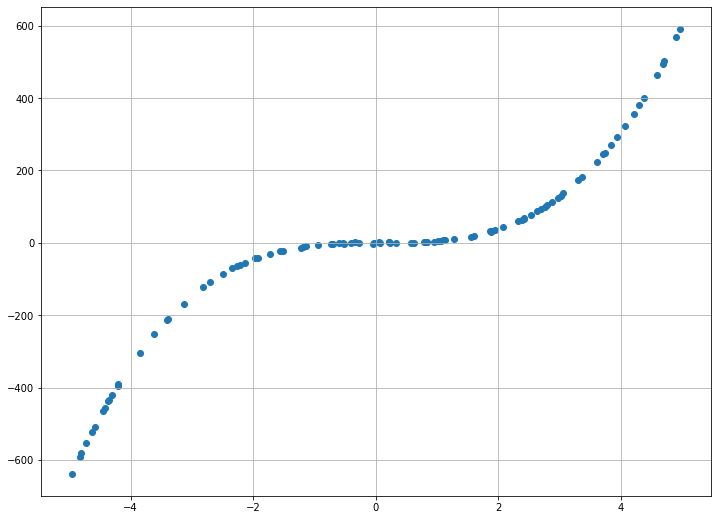

In [28]:
plt.figure(figsize=(12, 9))
plt.scatter(x, t)
plt.grid()

Marginal likelihood is the probability of the observed outcome given our input data, integrated over all values of $\mathbf{w}$

$$p(\mathbf{t|X, \mu_0, \Sigma_0}) = {\displaystyle \int p(\mathbf{t|X, w, \sigma^2}) p(\mathbf{w|\mu_0, \Sigma_0})} d\mathbf{w}$$

$$p(\mathbf{t|X, \mu_0, \Sigma_0}) = \mathcal{N}(\mathbf{X\mu_0}, \sigma^2\mathbf{I_N + X\Sigma_0X^T})$$

For each polynomial order, work out the marginal likelihood of observing the data.


1
2
3
4
5
6


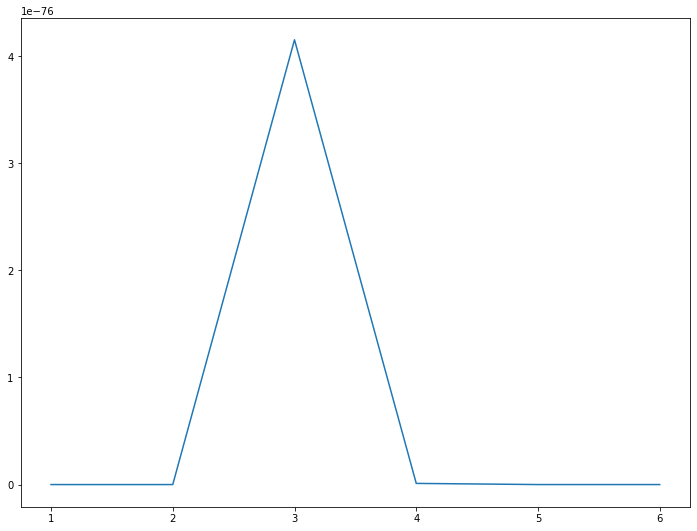

In [68]:
from scipy.stats import multivariate_normal
s = 1   # sigma

def generate_prior_w(n):
    return scipy.stats.multivariate_normal(np.zeros(n), np.identity(n))

def generate_X(x, n):
    X = np.polynomial.polynomial.polyvander(x, deg=n)
    return X

pinv = np.linalg.pinv

def likelihood(data, n, debug=False):
    # use all the data.
    X = generate_X(data.index, n)
    mu0 = np.zeros(n+1)
    sigma0 = np.identity(n+1)
    mu_p = np.einsum('ij,j->i', X, mu0)
    sigma_p = s**2 * np.identity(data.size) + np.einsum('ij,jk,km->im', X, sigma0, X.T)
    marginal = multivariate_normal(mu_p, sigma_p)
    likelihood = marginal.pdf(data.values)
    if debug:
        retvals = likelihood, marginal, mu_p, sigma_p
    else:
        retvals = likelihood,
    return retvals
    
results = {}
    
for deg in range(1, 7):
    print(deg)
    results[deg] = likelihood(data, deg)[0]
    
results = pd.Series(results)

results.plot(figsize=(12, 9))
    


In [67]:
ll

(0.0,)

In [48]:

mu0 = np.zeros(2)

sigma0 = np.identity(2)
intermediate = np.einsum('ij,jk->ik', X1, sigma0)

In [49]:
intermediate.shape

(100, 2)

In [52]:
np.einsum('km,mq->kq', intermediate, X1.T).shape

(100, 100)